# Python Statistics

### Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing
import xgboost as xgb
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('housing_sale_data.csv', engine='pyarrow', dtype_backend='pyarrow')

In [3]:
df.shape

(2930, 82)

In [4]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL           141     31770   Pave   
1      2  526350040           20        RH            80     11622   Pave   
2      3  526351010           20        RL            81     14267   Pave   
3      4  526353030           20        RL            93     11160   Pave   
4      5  527105010           60        RL            74     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0  <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
1  <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         <NA>   
2  <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Gar2   
3  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
4  <NA>       IR1          Lvl  ...         0    <NA>  MnPrv         <NA>   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [5]:
df.describe()

Order               PID  MS SubClass  Lot Frontage      Lot Area  \
count     2930.0            2930.0       2930.0        2440.0        2930.0   
mean      1465.5  714464496.988737    57.387372      69.22459  10147.921843   
std    845.96247   188730844.64939    42.638025     23.365335   7880.017759   
min          1.0       526301100.0         20.0          21.0        1300.0   
25%       733.25       528477022.5         20.0          58.0       7440.25   
50%       1465.5       535453620.0         50.0          68.0        9436.5   
75%      2197.75       907181097.5         70.0          80.0      11555.25   
max       2930.0      1007100110.0        190.0         313.0      215245.0   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count        2930.0        2930.0       2930.0          2930.0        2907.0   
mean       6.094881       5.56314  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min             1.0           1.0       1872.0          1950.0           0.0   
25%             5.0           5.0       1954.0          1965.0           0.0   
50%             6.0           5.0       1973.0          1993.0           0.0   
75%             7.0           6.0       2001.0          2004.0         164.0   
max            10.0           9.0       2010.0          2010.0        1600.0   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
count  ...        2930.0         2930.0          2930.0      2930.0   
mean   ...     93.751877      47.533447       23.011604    2.592491   
std    ...    126.361562        67.4834       64.139059   25.141331   
min    ...           0.0            0.0             0.0         0.0   
25%    ...           0.0            0.0             0.0         0.0   
50%    ...           0.0           27.0             0.0         0.0   
75%    ...         168.0           70.0             0.0         0.0   
max    ...        1424.0          742.0          1012.0       508.0   

       Screen Porch  Pool Area    Misc Val   Mo Sold      Yr Sold  \
count        2930.0     2930.0      2930.0    2930.0       2930.0   
mean      16.002048   2.243345   50.635154  6.216041  2007.790444   
std        56.08737  35.597181  566.344288  2.714492     1.316613   
min             0.0        0.0         0.0       1.0       2006.0   
25%             0.0        0.0         0.0       4.0       2007.0   
50%             0.0        0.0         0.0       6.0       2008.0   
75%             0.0        0.0         0.0       8.0       2009.0   
max           576.0      800.0     17000.0      12.0       2010.0   

           SalePrice  
count         2930.0  
mean   180796.060068  
std     79886.692357  
min          12789.0  
25%         129500.0  
50%         160000.0  
75%         213500.0  
max         755000.0  

[8 rows x 39 columns]

In [6]:
df.dtypes

Order              int64[pyarrow]
PID                int64[pyarrow]
MS SubClass        int64[pyarrow]
MS Zoning         string[pyarrow]
Lot Frontage       int64[pyarrow]
                       ...       
Mo Sold            int64[pyarrow]
Yr Sold            int64[pyarrow]
Sale Type         string[pyarrow]
Sale Condition    string[pyarrow]
SalePrice          int64[pyarrow]
Length: 82, dtype: object

### - Strings and Categories

In [7]:
# Compute and interpret summary statistics for categorical columns using the `.describe` method.
df.select_dtypes('string').describe().T

count unique      top  freq
MS Zoning       2930      7       RL  2273
Street          2930      2     Pave  2918
Alley            198      2     Grvl   120
Lot Shape       2930      4      Reg  1859
Land Contour    2930      4      Lvl  2633
Utilities       2930      3   AllPub  2927
Lot Config      2930      5   Inside  2140
Land Slope      2930      3      Gtl  2789
Neighborhood    2930     28    NAmes   443
Condition 1     2930      9     Norm  2522
Condition 2     2930      8     Norm  2900
Bldg Type       2930      5     1Fam  2425
House Style     2930      8   1Story  1481
Roof Style      2930      6    Gable  2321
Roof Matl       2930      8  CompShg  2887
Exterior 1st    2930     16  VinylSd  1026
Exterior 2nd    2930     17  VinylSd  1015
Mas Vnr Type    1155      4  BrkFace   880
Exter Qual      2930      4       TA  1799
Exter Cond      2930      5       TA  2549
Foundation      2930      6    PConc  1310
Bsmt Qual       2850      5       TA  1283
Bsmt Cond       2850      5       TA  2616
Bsmt Exposure   2847      4       No  1906
BsmtFin Type 1  2850      6      GLQ   859
BsmtFin Type 2  2849      6      Unf  2499
Heating         2930      6     GasA  2885
Heating QC      2930      5       Ex  1495
Central Air     2930      2        Y  2734
Electrical      2929      5    SBrkr  2682
Kitchen Qual    2930      5       TA  1494
Functional      2930      8      Typ  2728
Fireplace Qu    1508      5       Gd   744
Garage Type     2773      6   Attchd  1731
Garage Finish   2771      3      Unf  1231
Garage Qual     2771      5       TA  2615
Garage Cond     2771      5       TA  2665
Paved Drive     2930      3        Y  2652
Pool QC           13      4       Ex     4
Fence            572      4    MnPrv   330
Misc Feature     106      5     Shed    95
Sale Type       2930     10      WD   2536
Sale Condition  2930      6   Normal  2413

In [8]:
# Convert string columns to the `'category'` data type to save memory.
(df
 .select_dtypes('string')
 .memory_usage(deep=True)
 .sum()
)


np.int64(929599)

In [9]:

(df
 .select_dtypes('string')
 .astype('category')
 .memory_usage(deep=True)
 .sum()
)

np.int64(137945)

In [10]:
# Missing numeric columns 
(df
 .isna()
 .mean() 
 .mul(100)
 .pipe(lambda ser: ser[ser > 0])
)

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type      60.580205
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64

In [11]:
# Missing string values
(df
 .query('`Pool QC`.isna()')
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL           141     31770   Pave   
1         2  526350040           20        RH            80     11622   Pave   
2         3  526351010           20        RL            81     14267   Pave   
3         4  526353030           20        RL            93     11160   Pave   
4         5  527105010           60        RL            74     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL            37      7937   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   
2927   2928  923400125           85        RL            62     10441   Pave   
2928   2929  924100070           20        RL            77     10010   Pave   
2929   2930  924151050           60        RL            74      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
1     <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         <NA>   
2     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Gar2   
3     <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
4     <NA>       IR1          Lvl  ...         0    <NA>  MnPrv         <NA>   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925  <NA>       IR1          Lvl  ...         0    <NA>  GdPrv         <NA>   
2926  <NA>       IR1          Low  ...         0    <NA>  MnPrv         <NA>   
2927  <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         Shed   
2928  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2929  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2917 rows x 82 columns]

In [12]:
(df
 .query('`Pool QC` == "NA"')
)

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 82 columns]

In [13]:
# Fill in empty string with 'Not Applicable'
(df
 .assign(
     **df.select_dtypes('string').replace('', 'Not Applicable'))
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL           141     31770   Pave   
1         2  526350040           20        RH            80     11622   Pave   
2         3  526351010           20        RL            81     14267   Pave   
3         4  526353030           20        RL            93     11160   Pave   
4         5  527105010           60        RL            74     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL            37      7937   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   
2927   2928  923400125           85        RL            62     10441   Pave   
2928   2929  924100070           20        RL            77     10010   Pave   
2929   2930  924151050           60        RL            74      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
1     <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         <NA>   
2     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Gar2   
3     <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
4     <NA>       IR1          Lvl  ...         0    <NA>  MnPrv         <NA>   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925  <NA>       IR1          Lvl  ...         0    <NA>  GdPrv         <NA>   
2926  <NA>       IR1          Low  ...         0    <NA>  MnPrv         <NA>   
2927  <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         Shed   
2928  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2929  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [14]:
# Examining unique values
# Note the empty string
(df
 .Electrical
 .value_counts()
)

Electrical
SBrkr    2682
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64[pyarrow]

In [15]:
# Converting to Category
(df
 .assign(
     **df
     .select_dtypes('string')
     .replace('', 'Not Applicable')
     .astype('category')
 )
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL           141     31770   Pave   
1         2  526350040           20        RH            80     11622   Pave   
2         3  526351010           20        RL            81     14267   Pave   
3         4  526353030           20        RL            93     11160   Pave   
4         5  527105010           60        RL            74     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL            37      7937   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   
2927   2928  923400125           85        RL            62     10441   Pave   
2928   2929  924100070           20        RL            77     10010   Pave   
2929   2930  924151050           60        RL            74      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
1     <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         <NA>   
2     <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Gar2   
3     <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
4     <NA>       IR1          Lvl  ...         0    <NA>  MnPrv         <NA>   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925  <NA>       IR1          Lvl  ...         0    <NA>  GdPrv         <NA>   
2926  <NA>       IR1          Low  ...         0    <NA>  MnPrv         <NA>   
2927  <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         Shed   
2928  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2929  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

### Cleaning Numbers

In [16]:
(df
 .select_dtypes(int)
 .describe()
)

Order               PID  MS SubClass  Lot Frontage      Lot Area  \
count     2930.0            2930.0       2930.0        2440.0        2930.0   
mean      1465.5  714464496.988737    57.387372      69.22459  10147.921843   
std    845.96247   188730844.64939    42.638025     23.365335   7880.017759   
min          1.0       526301100.0         20.0          21.0        1300.0   
25%       733.25       528477022.5         20.0          58.0       7440.25   
50%       1465.5       535453620.0         50.0          68.0        9436.5   
75%      2197.75       907181097.5         70.0          80.0      11555.25   
max       2930.0      1007100110.0        190.0         313.0      215245.0   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count        2930.0        2930.0       2930.0          2930.0        2907.0   
mean       6.094881       5.56314  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min             1.0           1.0       1872.0          1950.0           0.0   
25%             5.0           5.0       1954.0          1965.0           0.0   
50%             6.0           5.0       1973.0          1993.0           0.0   
75%             7.0           6.0       2001.0          2004.0         164.0   
max            10.0           9.0       2010.0          2010.0        1600.0   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
count  ...        2930.0         2930.0          2930.0      2930.0   
mean   ...     93.751877      47.533447       23.011604    2.592491   
std    ...    126.361562        67.4834       64.139059   25.141331   
min    ...           0.0            0.0             0.0         0.0   
25%    ...           0.0            0.0             0.0         0.0   
50%    ...           0.0           27.0             0.0         0.0   
75%    ...         168.0           70.0             0.0         0.0   
max    ...        1424.0          742.0          1012.0       508.0   

       Screen Porch  Pool Area    Misc Val   Mo Sold      Yr Sold  \
count        2930.0     2930.0      2930.0    2930.0       2930.0   
mean      16.002048   2.243345   50.635154  6.216041  2007.790444   
std        56.08737  35.597181  566.344288  2.714492     1.316613   
min             0.0        0.0         0.0       1.0       2006.0   
25%             0.0        0.0         0.0       4.0       2007.0   
50%             0.0        0.0         0.0       6.0       2008.0   
75%             0.0        0.0         0.0       8.0       2009.0   
max           576.0      800.0     17000.0      12.0       2010.0   

           SalePrice  
count         2930.0  
mean   180796.060068  
std     79886.692357  
min          12789.0  
25%         129500.0  
50%         160000.0  
75%         213500.0  
max         755000.0  

[8 rows x 39 columns]

In [17]:
(df
 .query('`Lot Frontage`.isna()')
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
11       12  527165230           20        RL          <NA>      7980   Pave   
14       15  527182190          120        RL          <NA>      6820   Pave   
22       23  527368020           60        FV          <NA>      7500   Pave   
23       24  527402200           20        RL          <NA>     11241   Pave   
24       25  527402250           20        RL          <NA>     12537   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2894   2895  916326010           20        RL          <NA>     16669   Pave   
2897   2898  916403130           60        RL          <NA>     11170   Pave   
2898   2899  916460070           20        RL          <NA>      8098   Pave   
2912   2913  923226150           90        RL          <NA>     11836   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
11    <NA>       IR1          Lvl  ...         0    <NA>  GdPrv         Shed   
14    <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
22    <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
23    <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Shed   
24    <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2894  <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
2897  <NA>       IR2          Lvl  ...         0    <NA>  GdPrv         <NA>   
2898  <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
2912  <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
2926  <NA>       IR1          Low  ...         0    <NA>  MnPrv         <NA>   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
11        500       3    2010       WD           Normal     185000  
14          0       6    2010       WD           Normal     212000  
22          0       1    2010       WD           Normal     216000  
23        700       3    2010       WD           Normal     149000  
24          0       4    2010       WD           Normal     149900  
...       ...     ...     ...       ...             ...        ...  
2894        0       1    2006       WD           Normal     228000  
2897        0       4    2006       WD           Normal     250000  
2898        0      10    2006       WD           Normal     202000  
2912        0       3    2006       WD           Normal     146500  
2926        0       6    2006       WD           Normal     131000  

[490 rows x 82 columns]

In [18]:
# How to see more data
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
    )

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
11       12  527165230           20        RL          <NA>      7980   Pave   
14       15  527182190          120        RL          <NA>      6820   Pave   
22       23  527368020           60        FV          <NA>      7500   Pave   
23       24  527402200           20        RL          <NA>     11241   Pave   
24       25  527402250           20        RL          <NA>     12537   Pave   
55       56  528240070           60        RL          <NA>      7851   Pave   
57       58  528250100           80        RL          <NA>      7750   Pave   
58       59  528292020           60        RL          <NA>      9505   Pave   
74       75  531380080           60        RL          <NA>      8880   Pave   
79       80  531452180           60        RL          <NA>      9453   Pave   
86       87  532377060           20        RL          <NA>      9819   Pave   
88       89  532378110           20        RL          <NA>      6897   Pave   
99      100  533213030           20        FV          <NA>      4403   Pave   
100     101  533221090          160        FV          <NA>      2117   Pave   
101     102  533221110          160        FV          <NA>      2980   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2790   2791  907252050           60        RL          <NA>      9930   Pave   
2792   2793  907255010           20        RL          <NA>     11088   Pave   
2793   2794  907255050           20        RL          <NA>     14781   Pave   
2795   2796  907265030           20        RL          <NA>      8125   Pave   
2797   2798  907275030           60        RL          <NA>     21533   Pave   
2845   2846  909131125          190        RH          <NA>      7082   Pave   
2859   2860  909276010           70        RL          <NA>     11435   Pave   
2871   2872  909475020           20        RL          <NA>     16381   Pave   
2892   2893  916252170          120        RM          <NA>      8239   Pave   
2893   2894  916325040           20        RL          <NA>     50102   Pave   
2894   2895  916326010           20        RL          <NA>     16669   Pave   
2897   2898  916403130           60        RL          <NA>     11170   Pave   
2898   2899  916460070           20        RL          <NA>      8098   Pave   
2912   2913  923226150           90        RL          <NA>     11836   Pave   
2926   2927  923276100           20        RL          <NA>      8885   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
11    <NA>       IR1          Lvl    AllPub     Inside        Gtl   
14    <NA>       IR1          Lvl    AllPub     Corner        Gtl   
22    <NA>       Reg          Lvl    AllPub     Inside        Gtl   
23    <NA>       IR1          Lvl    AllPub    CulDSac        Gtl   
24    <NA>       IR1          Lvl    AllPub    CulDSac        Gtl   
55    <NA>       Reg          Lvl    AllPub     Inside        Gtl   
57    <NA>       IR1          Lvl    AllPub     Inside        Gtl   
58    <NA>       IR1          Lvl    AllPub    CulDSac        Gtl   
74    <NA>       IR1          Lvl    AllPub     Inside        Gtl   
79    <NA>       IR1          Lvl    AllPub    CulDSac        Gtl   
86    <NA>       IR1          Lvl    AllPub     Inside        Gtl   
88    <NA>       IR1          Lvl    AllPub     Corner        Gtl   
99    <NA>       IR2          Lvl    AllPub     Inside        Gtl   
100   <NA>       Reg          Lvl    AllPub     Inside        Gtl   
101   <NA>       Reg          Lvl    AllPub     Corner        Gtl   
...    ...       ...          ...       ...        ...        ...   
2790  <NA>       IR1          Lvl    AllPub     Inside        Gtl   
2792  <NA>       Reg          Lvl    AllPub     Corner        Gtl   
2793  <NA>       IR2          Lvl    AllPub    CulDSac        Gtl   
2795  <NA>       Reg          Lvl    AllPub     Inside        Gtl

In [19]:
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Lot Frontage`.isna()')
     .style
     .set_sticky(axis='columns') 
     .set_sticky(axis='index')
    )    

In [20]:
# Examine a column with missing values
(df
 .query('`Garage Yr Blt`.isna()')
 )

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
27       28  527425090           20        RL            70     10500   Pave   
119     120  534276360           20        RL            77      9320   Pave   
125     126  534427010           90        RL            98     13260   Pave   
129     130  534450180           20        RL            50      7207   Pave   
130     131  534451150           30        RL            55      5350   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2913   2914  923226180          180        RM            21      1470   Pave   
2916   2917  923228130          180        RM            21      1533   Pave   
2918   2919  923228210          160        RM            21      1526   Pave   
2919   2920  923228260          160        RM            21      1936   Pave   
2927   2928  923400125           85        RL            62     10441   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
27    <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
119   <NA>       IR1          Lvl  ...         0    <NA>   <NA>         Shed   
125   <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
129   <NA>       IR1          Lvl  ...         0    <NA>   <NA>         <NA>   
130   <NA>       IR1          Lvl  ...         0    <NA>   GdWo         Shed   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2913  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2916  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2918  <NA>       Reg          Lvl  ...         0    <NA>  GdPrv         <NA>   
2919  <NA>       Reg          Lvl  ...         0    <NA>   <NA>         <NA>   
2927  <NA>       Reg          Lvl  ...         0    <NA>  MnPrv         Shed   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
27          0       4    2010     ConLI          Normal     115000  
119       400       1    2010       WD           Normal     128950  
125         0       1    2010       Oth         Abnorml      84900  
129         0       2    2010       WD           Normal     116500  
130       450       5    2010       WD           Normal      76500  
...       ...     ...     ...       ...             ...        ...  
2913        0       4    2006       WD           Normal      73000  
2916        0       8    2006       WD          Abnorml      92000  
2918        0       6    2006       WD           Normal      79500  
2919        0       6    2006       WD           Normal      90500  
2927      700       7    2006       WD           Normal     132000  

[159 rows x 82 columns]

In [21]:
# missing + 2207!!!?
(df
 ['Garage Yr Blt']
 .describe()
)

count         2771.0
mean     1978.132443
std        25.528411
min           1895.0
25%           1960.0
50%           1979.0
75%           2002.0
max           2207.0
Name: Garage Yr Blt, dtype: double[pyarrow]

In [22]:
# probably a typo!!
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):  
    display(df.query('`Garage Yr Blt` > 2200'))

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2260   2261  916384070           20        RL            68      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
2260  <NA>       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
2260       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
2260             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
2260      VinylSd      VinylSd         <NA>          <NA>         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
2260         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2260           583            Unf             0          963           1546   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
2260    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
2260                0         1564               0               0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
2260          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
2260        Typ           1           Gd      Attchd           2207   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
2260           RFn            2          502          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
2260           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
2260             0          0    <NA>  <NA>         <NA>         0        9   

      Yr Sold Sale Type Sale Condition  SalePrice  
2260     2007       New        Partial     267300

In [23]:
# Any columns with Yr

(df
 .filter(like='Yr')
)

Garage Yr Blt  Yr Sold
0              1960     2010
1              1961     2010
2              1958     2010
3              1968     2010
4              1997     2010
...             ...      ...
2925           1984     2006
2926           1983     2006
2927           <NA>     2006
2928           1975     2006
2929           1993     2006

[2930 rows x 2 columns]

In [24]:
# Any columns with Yr > 2023
(df
 .filter(like='Yr')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

Garage Yr Blt  Yr Sold
2260           2207     2007

In [25]:
# What about "Year" columns?
(df
 .rename(columns=lambda name: name.replace('Yr', 'Year'))
 .filter(like='Year')
 .pipe(lambda df_: df_[df_.gt(2023).any(axis='columns')])
)

Year Built  Year Remod/Add  Garage Year Blt  Year Sold
2260        2006            2007             2207       2007

In [26]:
# Garage Yr Blt -> clip to max of Year Built
(df
 ['Garage Yr Blt']
 .clip(upper=df['Year Built'].max())
 .value_counts()
 .sort_index()
)

Garage Yr Blt
1895      1
1896      1
1900      6
1906      1
1908      1
       ... 
2006    115
2007    115
2008     61
2009     29
2010      6
Name: count, Length: 102, dtype: int64[pyarrow]

In [27]:
df['Year Built'].max()

2010

In [28]:
with pd.option_context('display.min_rows', 30, 'display.max_columns', 82):
    display(df
     .query('`Year Built`.max()')
    )    

Order                  2011
PID               903227140
MS SubClass              70
MS Zoning                RM
Lot Frontage             50
Lot Area               6000
Street                 Pave
Alley                  <NA>
Lot Shape               Reg
Land Contour            Lvl
Utilities            AllPub
Lot Config           Inside
Land Slope              Gtl
Neighborhood        BrkSide
Condition 1            Norm
                    ...    
Wood Deck SF              0
Open Porch SF             0
Enclosed Porch            0
3Ssn Porch                0
Screen Porch              0
Pool Area                 0
Pool QC                <NA>
Fence                  GdWo
Misc Feature           <NA>
Misc Val                  0
Mo Sold                   2
Yr Sold                2007
Sale Type               WD 
Sale Condition       Normal
SalePrice            128000
Name: 2010, Length: 82, dtype: object

In [29]:
# Update categories and clip
(df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .dtypes.value_counts()
)

int64[pyarrow]    39
category           8
category           2
category           2
category           2
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
category           1
Name: count, dtype: int64

### Shrinking Numbers

In [30]:
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)
    
memory_after_shirkining = (df
 .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
         **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
 .pipe(shrink_ints)
 .memory_usage(deep=True)
 .sum()
)

memory= (df
 .memory_usage(deep=True)
 .sum()
)

print(f"Memory {memory/1000}mb \nAfter Shirking numbers-Memory is {memory_after_shirkining/1000}mb. ")

Memory 1847.796mb 
After Shirking numbers-Memory is 360.288mb. 


In [31]:
# make function and use pipe to join it
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_data(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

clean_housing_data(df).dtypes

Order             uint16[pyarrow]
PID               uint32[pyarrow]
MS SubClass        uint8[pyarrow]
MS Zoning                category
Lot Frontage      uint16[pyarrow]
                       ...       
Mo Sold            uint8[pyarrow]
Yr Sold           uint16[pyarrow]
Sale Type                category
Sale Condition           category
SalePrice         uint32[pyarrow]
Length: 82, dtype: object

### Categorical Exploration

In [32]:
import pandas as pd
url = 'housing_sale_data.csv'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

<Axes: ylabel='MS Zoning'>

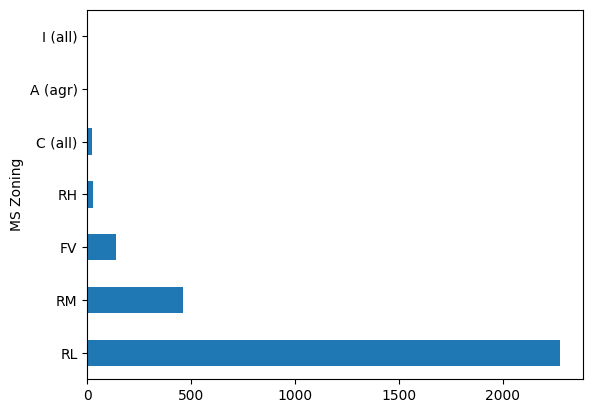

In [33]:
# categoricals
(housing
  ['MS Zoning']
  .value_counts()
  .plot.barh())

### Histograms and Distributions

<Axes: >

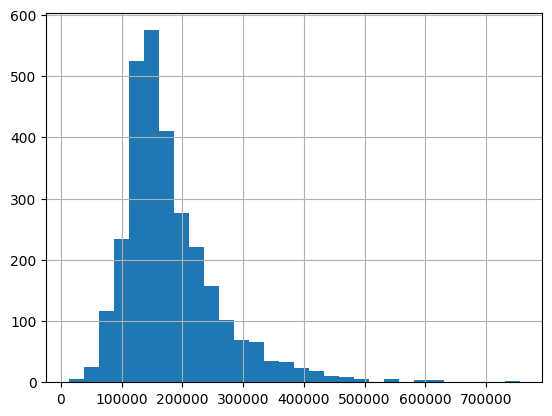

In [34]:
# Numerical
(housing
 .SalePrice
 .hist(bins=30)
)

### Outliers and Z-scores

In [35]:
# outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [36]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 .query('z_score.abs() >= 3' or 'z_score <= -3')
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
15       16  527216070           60        RL            47     53504   Pave   
44       45  528150070           20        RL           100     12919   Pave   
46       47  528176010           20        RL           110     14300   Pave   
366     367  527214050           20        RL            63     17423   Pave   
421     422  528102140           60        RL           110     14257   Pave   
422     423  528104070           60        RL           104     13518   Pave   
423     424  528106020           20        RL           105     15431   Pave   
431     432  528110010           60        RL            97     13478   Pave   
432     433  528110020           20        RL           105     13693   Pave   
433     434  528110090           60        RL           107     13891   Pave   
448     449  528166090           20        RL           110     15274   Pave   
456     457  528176030           20        RL           100     14836   Pave   
513     514  528441090           20        RL            85     11128   Pave   
968     969  921128050           20        RL            85     12633   Pave   
1051   1052  528102110           60        RL            96     12474   Pave   
1053   1054  528104080           60        RL            67     14948   Pave   
1059   1060  528118090           60        RL            96     12539   Pave   
1063   1064  528164060           20        RL           106     12720   Pave   
1067   1068  528178070           60        RL           130     16900   Pave   
1425   1426  906412010           20        RL            91     11778   Pave   
1637   1638  527216080           20        RL            52     51974   Pave   
1641   1642  527256030           20        RL            85     14082   Pave   
1642   1643  527256040           20        RL            81     13870   Pave   
1691   1692  528106050           60        RL           107     13641   Pave   
1693   1694  528106110           20        RL           105     15431   Pave   
1695   1696  528110040           20        RL           107     13891   Pave   
1699   1700  528114050           20        RL           110     14977   Pave   
1701   1702  528118050           20        RL            59     17169   Pave   
1760   1761  528320050           60        RL           160     15623   Pave   
1763   1764  528327060           20        RL          <NA>     11400   Pave   
1767   1768  528351010           60        RL           104     21535   Pave   
1772   1773  528366050           20        RL          <NA>     12692   Pave   
2097   2098  906340090           60        RL            77      9965   Pave   
2329   2330  527210030           60        RL            59     16023   Pave   
2330   2331  527210040           60        RL            60     18062   Pave   
2332   2333  527212030           60        RL            85     16056   Pave   
2334   2335  527214060           60        RL            82     16052   Pave   
2336   2337  527216050           60        RL            66     13682   Pave   
2341   2342  527256120           20        RL            90     18261   Pave   
2382   2383  528110050           20        RL           107     13891   Pave   
2400   2401  528170040           60        RL            56     20431   Pave   
2445   2446  528320060           60        RL           118     35760   Pave   
2450   2451  528360050           60        RL           114     17242   Pave   
2456   2457  528429120           20        RL            49     20896   Pave   
2666   2667  902400110           75        RM            90     22950   Pave   

     Alley Lot Shape Land Contour  ... Pool QC  Fence Misc Feature Misc Val  \
15    <NA>       IR2          HLS  ...    <NA>   <NA>         <NA>        0   
44    <NA>       IR1          Lvl  ...    <NA>   <NA>         <NA>        0   
46    <NA>       Reg          HLS  ...    <NA>   <NA>         <NA>        0   
366   <NA

In [37]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
15       16  527216070           60        RL            47     53504   Pave   
44       45  528150070           20        RL           100     12919   Pave   
46       47  528176010           20        RL           110     14300   Pave   
366     367  527214050           20        RL            63     17423   Pave   
421     422  528102140           60        RL           110     14257   Pave   
422     423  528104070           60        RL           104     13518   Pave   
423     424  528106020           20        RL           105     15431   Pave   
431     432  528110010           60        RL            97     13478   Pave   
432     433  528110020           20        RL           105     13693   Pave   
433     434  528110090           60        RL           107     13891   Pave   
448     449  528166090           20        RL           110     15274   Pave   
456     457  528176030           20        RL           100     14836   Pave   
513     514  528441090           20        RL            85     11128   Pave   
968     969  921128050           20        RL            85     12633   Pave   
1051   1052  528102110           60        RL            96     12474   Pave   
1053   1054  528104080           60        RL            67     14948   Pave   
1056   1057  528110110           20        RL           105     13693   Pave   
1059   1060  528118090           60        RL            96     12539   Pave   
1063   1064  528164060           20        RL           106     12720   Pave   
1064   1065  528166120           60        RL           110     13688   Pave   
1067   1068  528178070           60        RL           130     16900   Pave   
1425   1426  906412010           20        RL            91     11778   Pave   
1637   1638  527216080           20        RL            52     51974   Pave   
1641   1642  527256030           20        RL            85     14082   Pave   
1642   1643  527256040           20        RL            81     13870   Pave   
1690   1691  528106040           20        RL           107     14450   Pave   
1691   1692  528106050           60        RL           107     13641   Pave   
1693   1694  528106110           20        RL           105     15431   Pave   
1695   1696  528110040           20        RL           107     13891   Pave   
1699   1700  528114050           20        RL           110     14977   Pave   
1700   1701  528118040           60        RL           118     13654   Pave   
1701   1702  528118050           20        RL            59     17169   Pave   
1760   1761  528320050           60        RL           160     15623   Pave   
1763   1764  528327060           20        RL          <NA>     11400   Pave   
1767   1768  528351010           60        RL           104     21535   Pave   
1772   1773  528366050           20        RL          <NA>     12692   Pave   
1780   1781  528431040           20        RL            98     12291   Pave   
2097   2098  906340090           60        RL            77      9965   Pave   
2329   2330  527210030           60        RL            59     16023   Pave   
2330   2331  527210040           60        RL            60     18062   Pave   
2332   2333  527212030           60        RL            85     16056   Pave   
2334   2335  527214060           60        RL            82     16052   Pave   
2336   2337  527216050           60        RL            66     13682   Pave   
2341   2342  527256120           20        RL            90     18261   Pave   
2379   2380  528102080           60        RL            72     16387   Pave   
2382   2383  528110050           20        RL           107     13891   Pave   
2384   2385  528114010           20        RL           120     14780   Pave   
2400   2401  528170040           60        RL            56     20431   Pave   
2445   2446  528320060           60        RL           118     35760   Pave   
2450  

### Correlations

In [38]:
# Pearson correlation
housing.corr(numeric_only=True)

Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF      0.005780 -0.087707    -0.130421      0.116743  0.023658   
Total Bsmt SF   -0.028719 -0.189642    -0.219445      0.353773  0.253589   
1st Flr SF      -0.013201 -0.141902    -0.247828      0.457391  0.332235   
2nd Flr SF      -0.000417 -0.003289     0.304237      0.029187  0.032996   
Low Qual Fin SF  0.013589  0.056940     0.025765      0.005249  0.000812   
Gr Liv Area     -0.009342 -0.107579     0.068061      0.383822  0.285599   
Bsmt Full Bath  -0.042539 -0.037759     0.013701      0.108915  0.125877   
Bsmt Half Bath   0.024978  0.004328    -0.003329     -0.024724  0.026903   
Full Bath       -0.044985 -0.171431     0.134631      0.184521  0.127433   
Half Bath       -0.039749 -0.166636     0.175879      0.041880  0.035497   
Bedroom AbvGr    0.015424  0.006345    -0.019208      0.240442  0.136569   
Kitchen AbvGr   -0.017685  0.076470     0.257698      0.005407 -0.020301   
TotRms AbvGrd    0.002612 -0.068981     0.031898      0.353137  0.216597   
Fireplaces      -0.019156 -0.108056    -0.049955      0.257255  0.256989   
Garage Yr Blt   -0.054580 -0.263692     0.092526      0.077801 -0.008383   
Garage Cars     -0.036185 -0.237484    -0.045883      0.308706  0.179512   
Garage Area     -0.035435 -0.210606    -0.103239      0.358505  0.212822   
Wood Deck SF    -0.011292 -0.051135    -0.017310      0.120084  0.157212   
Open Porch SF    0.016355 -0.071311    -0.014823      0.163040  0.103760   
Enclosed Porch   0.027908  0.162519    -0.022866      0.012758  0.021868   
3Ssn Porch      -0.024975 -0.024894    -0.037956      0.028564  0.016243   
Screen Porch     0.004307 -0.025735    -0.050614      0.076666  0.055044   
Pool Area        0.052518 -0.002845    -0.003434      0.173947  0.093775   
Misc Val        -0.006083 -0.008260    -0.029254      0.044476  0.069188   
Mo Sold          0.133365 -0.050455     0.000350      0.011085  0.003859   
Yr Sold         -0.975993  0.009579    -0.017905     -0.007547 -0.023085   
SalePrice       -0.031408 -0.246521    -0.085092      0.357318  0.266549   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Order               -0.048500     -0.011054   -0.052319       -0.075566   
PID                 -0.263147      0.104451   -0.343388       -0.157111   
MS SubClass          0.039419     -0.067349    0.036579        0.043397   
Lot Frontage         0.212042     -0.074448    0.121562        0.091712   
Lot Area             0.097188     -0.034759    0.023258        0.021682   
Overall Qual         1.000000     -0.094812    0.597027        0.569609   
Overall Cond        -0.094812      1.000000   -0.368773        0.047680   
Year Built           0.597027     -0.368773    1.000000        0.612095   
Year Remod/Add       0.569609      0.047680    0.612095        1.000000   
Mas Vnr Area         0.429418     -0.135340    0.313292        0.196928   
BsmtFin SF 1         0.284118     -0.050935    0.279870        0.151790   
BsmtFin SF 2        -0.041287      0.041134   -0.027415       -0.062129   
Bsmt

In [39]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

### Scatter Plots

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

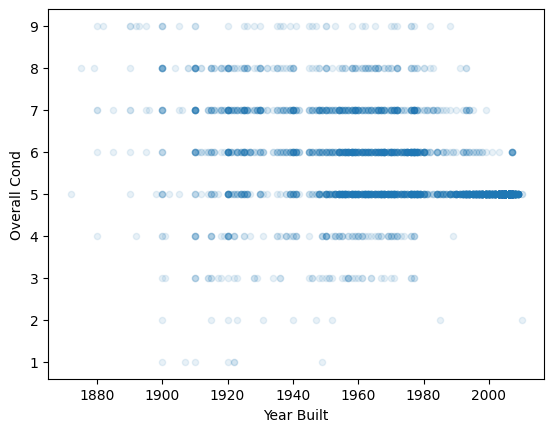

In [40]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

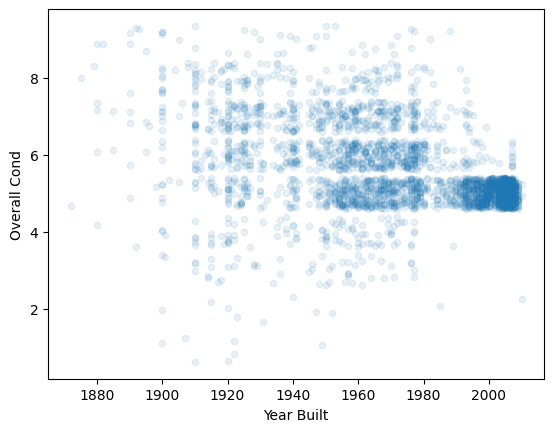

In [41]:
# with jitter in y
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

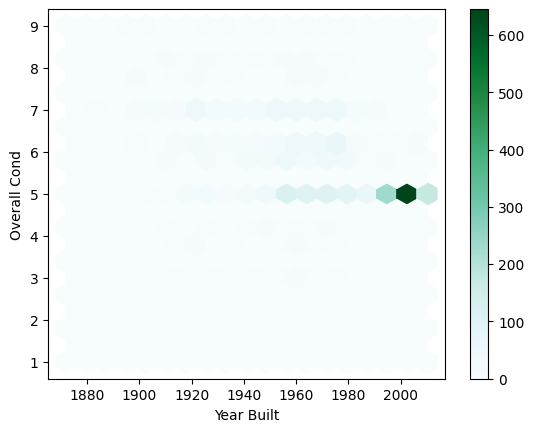

In [42]:
(housing
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

### Visualizing Categoricals and Numerical Values

<Axes: >

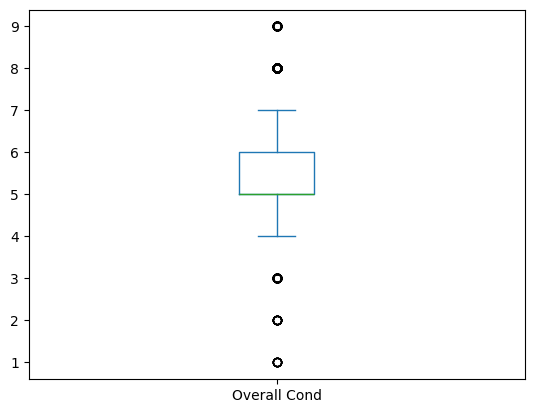

In [43]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

<Axes: >

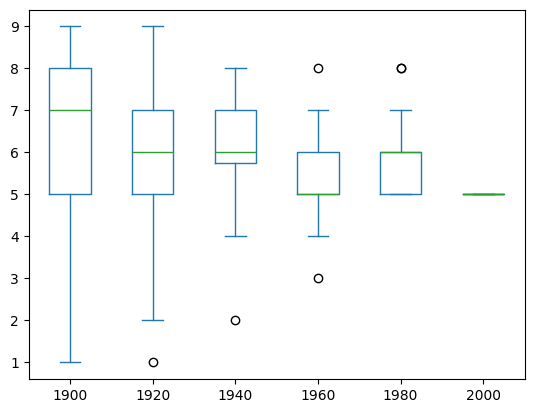

In [44]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

<Axes: xlabel='Year Built', ylabel='Overall Cond'>

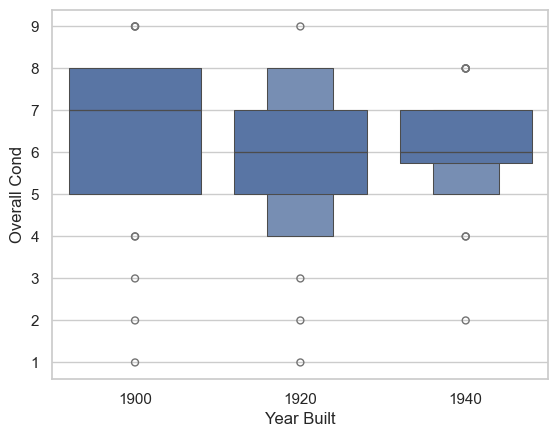

In [45]:
# using seaborn
sns.set(style='whitegrid')
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

### Comparing Two Categoricals

In [46]:
# 2 columns Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

C:\Users\deepa\AppData\Local\Temp\ipykernel_6756\1504741807.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Overall Qual', 'Bsmt Cond'])


Bsmt Cond     Ex  Fa  Gd  Po   TA
Overall Qual                     
1              0   0   0   1    0
2              0   4   0   0    5
3              0   9   0   0   21
4              0  16   2   1  182
5              1  39  24   2  727
6              1  28  28   0  672
7              0   5  33   0  561
8              1   3  25   1  320
9              0   0   9   0   98
10             0   0   1   0   30

In [47]:
# using inbuilt crosstab method
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

In [48]:
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

### Linear Regression

In [49]:
def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    

In [50]:
# need to remove na for linear regression to work
housing_with_no_na = clean_housing_no_na(raw)

X = housing_with_no_na.select_dtypes('number').drop(columns='SalePrice')
y = housing_with_no_na.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.8434707037243713

In [51]:
lr.coef_

array([-1.03814738e+01,  9.02411860e-07, -1.63050576e+02,  2.81284818e+01,
        4.92668567e-01,  1.73466716e+04,  4.84079679e+03,  3.91645014e+02,
        1.76965630e+02,  2.73066661e+01,  1.05967269e+01,  4.13482965e+00,
       -2.72937988e+00,  1.20021762e+01,  1.87157913e+01,  2.54896650e+01,
       -9.18032349e+00,  3.50251329e+01,  7.35666770e+03, -1.51315712e+03,
       -1.41742224e+02, -5.39960782e+03, -7.73039749e+03, -1.43271176e+04,
        1.36191997e+03,  3.51407523e+03, -1.31044446e+01,  1.03630326e+04,
        1.49225509e+01,  1.99789208e+01, -6.04065085e+00,  2.04208107e+01,
       -5.67776073e+00,  7.08392922e+01, -3.93865793e+01, -8.71867696e+00,
        2.35118730e+02, -8.15826993e+03])

In [52]:
lr.intercept_

np.float64(15240773.746057382)

In [53]:
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

<Axes: >

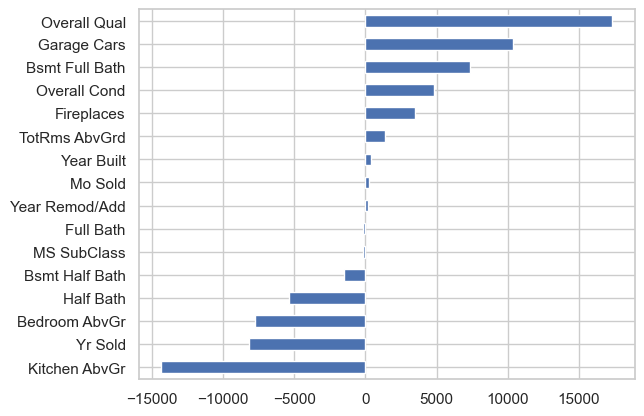

In [54]:
(pd.Series(lr.coef_, index=lr.feature_names_in_)
 .pipe(lambda ser: ser[ser.abs() > 100])
 .sort_values()
 .plot.barh())


In [55]:
# with Standardizing Values

std = preprocessing.StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.843229859921004

<Axes: >

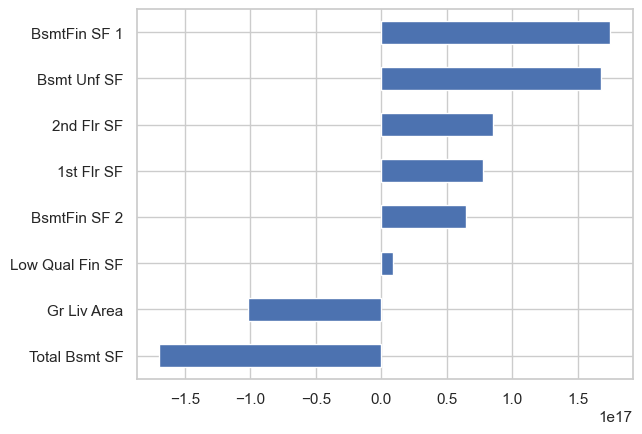

In [56]:
(pd.Series(lr.coef_, index=X.columns)
 .sort_values()
 .pipe(lambda ser: ser[ser.abs() > 1e8])
 .plot.barh()
)

### Regression with XGBoost

In [58]:
# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing_no_na(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
     .pipe(lambda df_: df_.assign(**df_.select_dtypes('number').fillna(0)))
    )    
    

housing2 = clean_housing_no_na(raw)

In [61]:
X = housing2.select_dtypes('number').drop(columns='SalePrice')
y = housing2.SalePrice

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

std = preprocessing.StandardScaler().set_output(transform='pandas')
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


xg = xgb.XGBRegressor()
xg.fit(X_train, y_train)
xg.score(X_test, y_test)

0.9202607274055481

In [62]:
# Use categories as well
X_cat = (housing.assign(**housing.select_dtypes('number').astype('Int64')).drop(columns='SalePrice'))
y_cat = housing.SalePrice

X_cat_train, X_cat_test, y_cat_train, y_cat_test = model_selection.train_test_split(X_cat, y_cat, random_state=42)

xg_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')

xg_cat.fit(X_cat_train, y_cat_train)
xg_cat.score(X_cat_test, y_cat_test)

0.921321451663971

<Axes: >

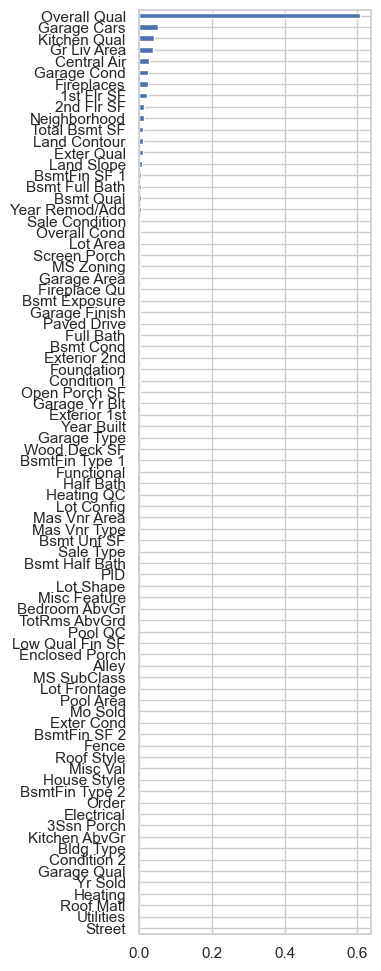

In [63]:
pd.Series(xg_cat.feature_importances_, index=xg_cat.feature_names_in_).sort_values().plot.barh(figsize=(3,12))

### Hypothesis Test

In [64]:
(housing
 .groupby('Neighborhood')
 .describe()
 .loc[['CollgCr', 'NAmes'], ['SalePrice']]
 .T
)

C:\Users\deepa\AppData\Local\Temp\ipykernel_6756\2884382520.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Neighborhood')


Neighborhood           CollgCr          NAmes
SalePrice count          267.0          443.0
          mean   201803.434457  145097.349887
          std     54187.843749   31882.707229
          min         110000.0        68000.0
          25%         160875.0       127000.0
          50%         200000.0       140000.0
          75%         228250.0       157500.0
          max         475000.0       345000.0

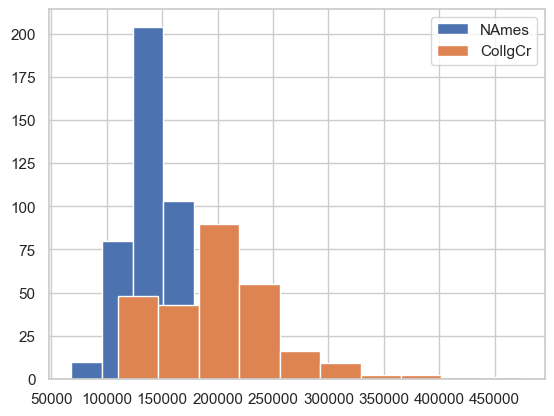

In [65]:
n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr')
ax.legend()

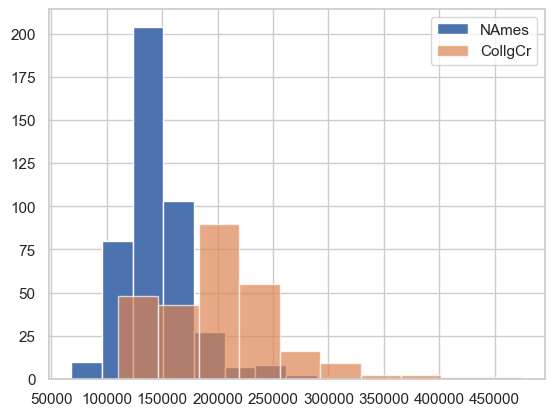

In [66]:
# with alpha 
alpha = .7

n_ames = (housing
          .query('Neighborhood == "NAmes"')
          .SalePrice)
college_cr = (housing
          .query('Neighborhood == "CollgCr"')
          .SalePrice)

ax = n_ames.hist(label='NAmes')
college_cr.hist(ax=ax, label='CollgCr', alpha=alpha)
ax.legend()

0       215000
1       105000
2       172000
3       244000
23      149000
         ...  
2630    155000
2631    134500
2632    120000
2633    105000
2634    124000
Name: SalePrice, Length: 443, dtype: uint32[pyarrow]

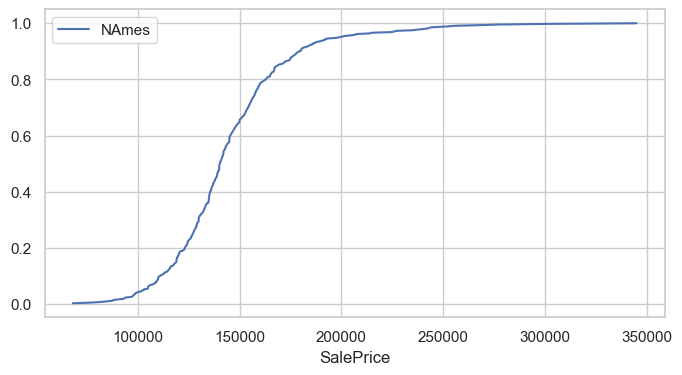

In [67]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
#plot_cdf(college_cr, label='CollegeCr', ax=ax)

249     245350
250     206000
251     198900
252     187000
256     159000
         ...  
2811    196500
2812    198000
2813    173900
2814    163990
2815    164990
Name: SalePrice, Length: 267, dtype: uint32[pyarrow]

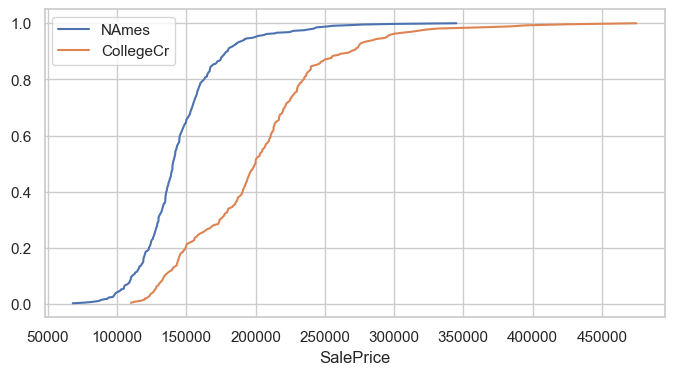

In [68]:
def plot_cdf(ser, ax=None, label=''):
    (ser
     .to_frame()
     .assign(cdf=ser.rank(method='average', pct=True))
     .sort_values(by='SalePrice')
     .plot(x='SalePrice', y='cdf', label=label, ax=ax)
    )
    return ser
    
fig, ax = plt.subplots(figsize=(8,4))
plot_cdf(n_ames, label='NAmes', ax=ax)
plot_cdf(college_cr, label='CollegeCr', ax=ax)

In [69]:
###  Running Statistical Tests

In [70]:
ks_statistic, p_value = stats.ks_2samp(n_ames, college_cr)
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Fail to reject null hypothesis: Same distribution')
else:
    print('Reject null hypothesis: Not from the same distribution')

0.5836609430085982 3.2892428354379855e-53
Reject null hypothesis: Not from the same distribution


### Testing for Normality

In [71]:
shapiro_stat, p_value = stats.shapiro(n_ames)

if p_value > 0.05:
    print("The distribution of the series is likely normal (fail to reject H0)")
else:
    print("The distribution of the series is likely not normal (reject H0)")

The distribution of the series is likely not normal (reject H0)


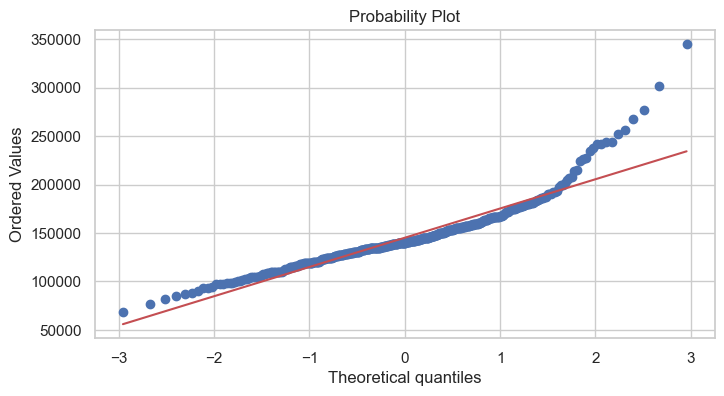

In [72]:
fig, ax = plt.subplots(figsize=(8,4))
_ = stats.probplot(n_ames, plot=ax)